enter window size: 12
enter col no: 0
enter window size: 24
enter col no: 0


Text(0.5, 1.0, 'Rainfall (mm), Trend')

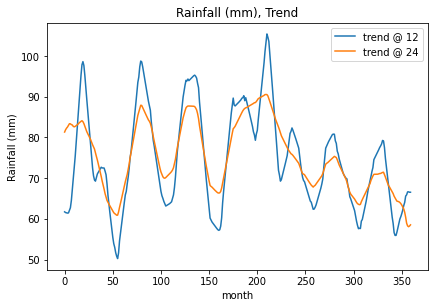

In [6]:
import pandas as pd
import numpy as pi
import numpy as np
import os
import matplotlib.pyplot as plt
 
import matplotlib.gridspec as gridspec
 
from pyts.decomposition import SingularSpectrumAnalysis

#<------------------------------------------------------------------------------------------------------------------>

df= pd.read_csv("C:/Users/Triumph/Desktop/RData/Bagre_Dam_Operation.csv")


#df["Camontdeb(m)"] = df["Camontdeb(m)"].str.replace("..", ".", regex=False).astype(float)


tested_columns = ['Rainfall (mm)','V_Evaporation', 'V_Irrigation', 'V_Spillage', 'V_Inflow', 'Water_Level/depth(m)']

X = df[tested_columns].values.T

year=pd.to_datetime(df["Date"]).dt.year.tolist()

#use this window size of 12
window_size =int(input('enter window size: '))


ssa = SingularSpectrumAnalysis(window_size=window_size, groups=None)

X_ssa = ssa.fit_transform(X)

# -> only plotting

plt.figure(figsize=(15, 10))

gs = gridspec.GridSpec(2, 2)


plt.subplot(gs[1, 1])

#enter any number from 0 - 6 to get the output. eg, 0 for rainfall; 1 for V_Evaporation etc
col =int(input('enter col no: ')) 


#plt.plot(X[col, :] , label= "original", alpha=.4)
plt.plot(X_ssa[col, 0, :] , label="trend @ 12")
#plt.plot(X_ssa[col])
#X_ssa.plot_wcorr()

#plt.plot(X_ssa[col, 1, :], label="periodic")

#plt.plot(X_ssa[col, 2, :], label="noise")

plt.legend()

plt.xlabel("month")
plt.ylabel("Rainfall (mm)") ##change the variable as plotted
plt.title(f"{tested_columns[col]}")


#<--------------------------------------------------------------------------------------------->
#to run a second trend of thesame variable



X1 = df[tested_columns].values.T
pd.to_datetime(df["Date"]).dt.year.tolist()


#use a different window length for the same variable eg, 24
uwindow_size =int(input('enter window size: '))

wssa = SingularSpectrumAnalysis(window_size=uwindow_size, groups=None)

iX_ssa = wssa.fit_transform(X1)

plt.subplot(gs[1, 1])

#use thesame variable choice made above
col =int(input('enter col no: '))

#plt.plot(X[col, :] , label= "original", alpha=.4)

plt.plot(iX_ssa[col, 0, :], label="trend @ 24")

#plt.plot(X_ssa[col, 1, :], label="periodic")

#plt.plot(X_ssa[col, 2, :], label="noise")

plt.legend()

plt.xlabel("month")
plt.ylabel("Rainfall (mm)") #change the variable as plotted
plt.title(f"{tested_columns[col]}, Trend")

#<--------------------------------------------------------------------------->#







enter window size: 60
enter col no: 0
enter window size: 120
enter col no: 0


Text(0.5, 1.0, 'Rainfall (mm)')

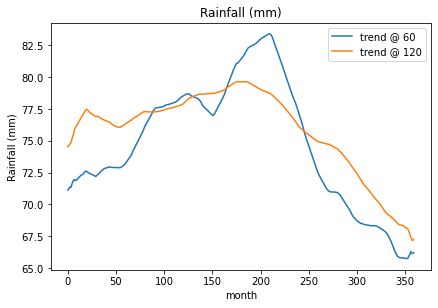

In [7]:
#to further analyse for window length of 60 and 120


X2, year = df[tested_columns].values.T, pd.to_datetime(df["Date"]).dt.year.tolist()

#window length of 60 
u_window_size =int(input('enter window size: '))

  
i_ssa = SingularSpectrumAnalysis(window_size=u_window_size, groups=None)

X_ssa_i = i_ssa.fit_transform(X2)

plt.figure(figsize=(15, 10))
plt.subplot(gs[1, 1])

#maintain the same column as above 
col =int(input('enter col no: '))


#plt.plot(X[col, :] , label= "original", alpha=.4)

plt.plot(X_ssa_i[col, 0, :]  , label="trend @ 60")

#plt.plot(X_ssa[col, 1, :], label="periodic")

#plt.plot(X_ssa[col, 2, :], label="noise")

plt.legend()

plt.xlabel("month")
plt.ylabel("Rainfall (mm)") #change the variable as plotted
plt.title(f"{tested_columns[col]}")


#<------------------------------------------------------->



X3, year = df[tested_columns].values.T, pd.to_datetime(df["Date"]).dt.year.tolist()


#enter 120 window length
l_window_size =int(input('enter window size: '))


l_ssa = SingularSpectrumAnalysis(window_size=l_window_size, groups=None)

l_X_ssa = l_ssa.fit_transform(X3)

plt.subplot(gs[1, 1])

#maintain the same column as above 
col =int(input('enter col no: '))


#plt.plot(X[col, :] , label= "original", alpha=.4)

plt.plot(l_X_ssa[col, 0, :] , label="trend @ 120")

#plt.plot(X_ssa[col, 1, :], label="periodic")

#plt.plot(X_ssa[col, 2, :], label="noise")

plt.legend()

plt.xlabel("month")
plt.ylabel("Rainfall (mm)")  #change the variable as plotted
plt.title(f"{tested_columns[col]}")

